In [65]:
import json
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import matplotlib.pyplot as plt


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
# not sure if these values are correct [must double check]
gg_total = 7
cf_total = 8
le_total = 5

gg_quorum = 5
cf_quorum = 6
le_quorum = 3

In [67]:
# code to read in and parse data

input_file = '/content/drive/MyDrive/IW-F24/data/ips.json'
output_folder = '/content/drive/MyDrive/IW-F24/analyzed-ips'

with open(input_file, 'r') as file:
    data = json.load(file)

gg = data['gg']
cf = data['cf']
le = data['le']

num_nodes = len(gg)

print(num_nodes)



26


average: 0.5846153846153845
median: 0.592


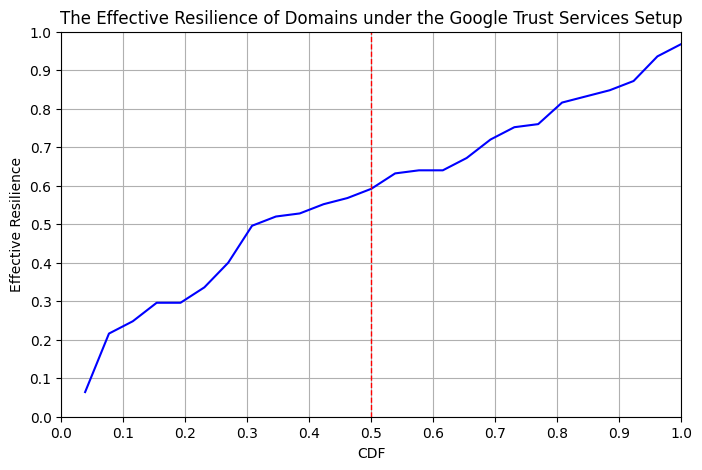

In [68]:
# create cdf of domain resilience for gts setup
gg_analyzed = {}
avg = 0

for victim in gg:
  node_res = 0
  for adversary in gg[victim]:
    attack = gg[victim][adversary]
    # tally number of failed attacks
    for i in range(5):
     count = len(attack[i])
     if(count > gg_total - gg_quorum):
      node_res += 1
  node_res /= 5 * (num_nodes - 1)
  avg += node_res
  gg_analyzed[victim] = node_res

avg /= (num_nodes)
print("average: " + str(avg))

gg_res_sorted = np.sort(list(gg_analyzed.values()))
med_index = int(num_nodes/2 - 1)
median = gg_res_sorted[med_index]
print("median: " + str(median))
gg_cdf = np.arange(1, len(gg_res_sorted) + 1) / len(gg_res_sorted)

plt.figure(figsize=(8, 5))
plt.plot(gg_cdf, gg_res_sorted, linestyle='-', color='b')
plt.title('The Effective Resilience of Domains under the Google Trust Services Setup')
plt.ylabel('Effective Resilience')
plt.xlabel('CDF')
plt.grid(True)

# add vertical lines at certain percentile
#plt.axvline(x=0.1, color='red', linestyle='--', linewidth=1)
plt.axvline(x=0.5, color='red', linestyle='--', linewidth=1)

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.show()


average: 0.6489230769230769
median: 0.712


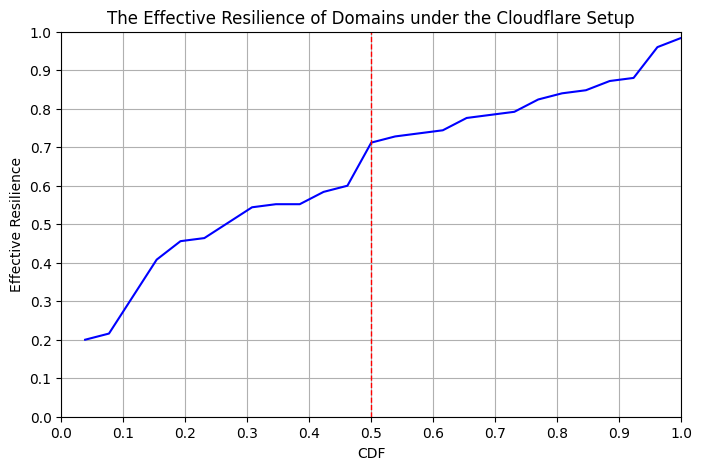

In [69]:
# create cdf of domain resilience for cf setup
cf_analyzed = {}
avg = 0

for victim in cf:
  node_res = 0
  for adversary in cf[victim]:
    attack = cf[victim][adversary]
    # tally number of failed attacks
    for i in range(5):
     count = len(attack[i])
     if(count > cf_total - cf_quorum):
      node_res += 1
  node_res /= 5 * (num_nodes - 1)
  avg += node_res
  cf_analyzed[victim] = node_res

avg /= (num_nodes)
print("average: " + str(avg))

cf_res_sorted = np.sort(list(cf_analyzed.values()))
med_index = int(num_nodes/2 - 1)
median = cf_res_sorted[med_index]
print("median: " + str(median))
cf_cdf = np.arange(1, len(cf_res_sorted) + 1) / len(cf_res_sorted)

plt.figure(figsize=(8, 5))
plt.plot(cf_cdf, cf_res_sorted, linestyle='-', color='b')
plt.title('The Effective Resilience of Domains under the Cloudflare Setup')
plt.ylabel('Effective Resilience')
plt.xlabel('CDF')
plt.grid(True)

# add vertical lines at certain percentile
#plt.axvline(x=0.1, color='red', linestyle='--', linewidth=1)
plt.axvline(x=0.5, color='red', linestyle='--', linewidth=1)

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.show()

average: 0.2307692307692308
median: 0.16


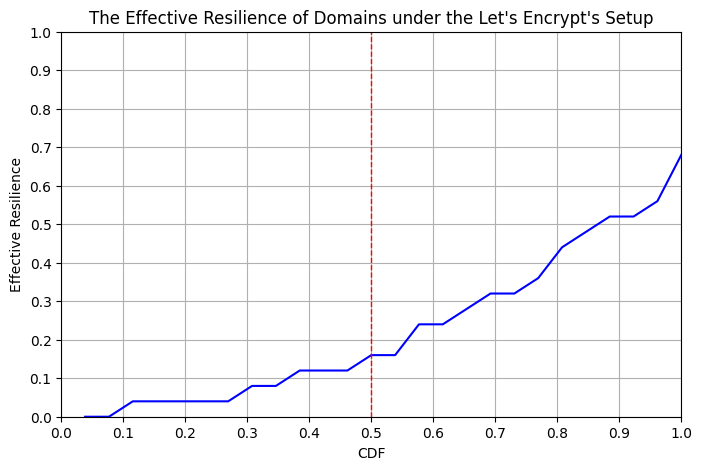

In [70]:
# create cdf of domain resilience for le setup
le_analyzed = {}
avg = 0

for victim in le:
  node_res = 0
  for adversary in le[victim]:
    for item in le[victim][adversary]:
      count = len(item)
      # need to check if primary vantage point succeeds
      # then check if at least 3 point to victim
      if(count > le_total - le_quorum):
        node_res += 1
  node_res /= (num_nodes - 1)
  avg += node_res
  le_analyzed[victim] = node_res

avg /= num_nodes
print("average: " + str(avg))

le_res_sorted = np.sort(list(le_analyzed.values()))
med_index = int(num_nodes/2 - 1)
median = le_res_sorted[med_index]
print("median: " + str(median))
le_cdf = np.arange(1, len(le_res_sorted) + 1) / len(le_res_sorted)

plt.figure(figsize=(8, 5))
plt.plot(le_cdf, le_res_sorted, linestyle='-', color='b')
plt.title("The Effective Resilience of Domains under the Let's Encrypt's Setup")
plt.ylabel('Effective Resilience')
plt.xlabel('CDF')
plt.grid(True)

# add vertical lines at certain percentile
#plt.axvline(x=0.1, color='red', linestyle='--', linewidth=1)
plt.axvline(x=0.5, color='red', linestyle='--', linewidth=1)

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.show()